# 机器学习练习 - 回归

## 单变量线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
path = 'data/regress_data1.csv'
data = pd.read_csv(path)
data.head()

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


看下数据长什么样子

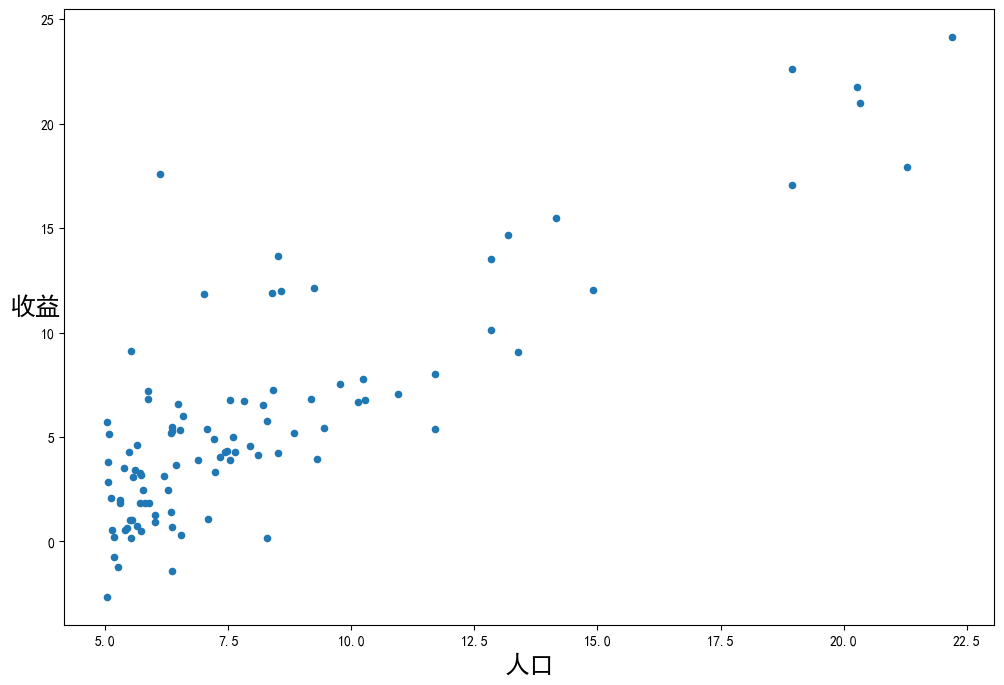

In [5]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(12,8))
plt.xlabel('人口', fontsize=18)
plt.ylabel('收益', rotation=0, fontsize=18)
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化代价函数。 

首先，我们将创建一个以参数$w$为特征函数的代价函数

$$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

其中：

$$\\{{h}}\left( x \right)={{w}^{T}}X={{w }_{0}}{{x}_{0}}+{{w }_{1}}{{x}_{1}}+{{w }_{2}}{{x}_{2}}+...+{{w }_{n}}{{x}_{n}}\\

In [54]:
X.shape

(97, 2)

In [6]:
def computeCost(X, y, w):
    inner = np.power(((X * w.T) - y), 2)# (m,n) @ (n, 1) -> (n, 1)
#     return np.sum(inner) / (2 * len(X))
    return np.sum(inner) / (2 * X.shape[0])

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [7]:
data.insert(0, 'Ones', 1)
data

,Ones,人口,收益
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


现在我们来做一些变量初始化。

In [57]:
data.shape[1]

3

In [10]:
# set X (training data) and y (target variable)
cols = data.shape[1]   # 3
# cols
X = data.iloc[:,:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:]#X是所有行，最后一列

观察下 X (训练集) and y (目标变量)是否正确.

In [11]:
X.head()#head()是观察前5行

,Ones,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
y.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化w。

In [13]:
X = np.matrix(X.values)
y = np.matrix(y.values)
w = np.matrix(np.array([0,0]))

w 是一个(1,2)矩阵

In [14]:
w

matrix([[0, 0]])

看下维度

In [15]:
X.shape, w.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数 (theta初始值为0).

In [16]:
computeCost(X, y, w)

32.072733877455676

# Batch Gradient Decent（批量梯度下降）

$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right)$$

In [29]:
def batch_gradientDescent(X, y, w, alpha, iters):
    temp = np.matrix(np.zeros(w.shape))    # matrix([[0., 0.]])
    parameters = int(w.ravel().shape[1])   # 2
    cost = np.zeros(iters)                 # 1000个 0 的array

    for i in range(iters):                 # 循环1000次
        error = (X * w.T) - y              # 相当于 y - f(x)

        for j in range(parameters):        # j 取值 [0,1]                                      👇 error = (X * w.T) - y
            term = np.multiply(error, X[:, j])  # 误差的矩阵 和 x1  x2 的矩阵 相乘 ∂j(w)/∂w = -(y-y^)x_j
            temp[0, j] = w[0, j] - ((alpha / len(X)) * np.sum(term))   
         #          w0 := w0     -  η ∂j(w)/∂w            👆 批量梯度下降 用sum
        w = temp
        cost[i] = computeCost(X, y, w)

    return w, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [48]:
alpha = 0.01
iters = 1000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [50]:
g, cost = batch_gradientDescent(X, y, w, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [18]:
computeCost(X, y, g)

4.515955503078914

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

In [51]:
np.linspace(data['人口'].min(), data['人口'].max(), 100)

array([ 5.0269    ,  5.20039596,  5.37389192,  5.54738788,  5.72088384,
        5.8943798 ,  6.06787576,  6.24137172,  6.41486768,  6.58836364,
        6.7618596 ,  6.93535556,  7.10885152,  7.28234747,  7.45584343,
        7.62933939,  7.80283535,  7.97633131,  8.14982727,  8.32332323,
        8.49681919,  8.67031515,  8.84381111,  9.01730707,  9.19080303,
        9.36429899,  9.53779495,  9.71129091,  9.88478687, 10.05828283,
       10.23177879, 10.40527475, 10.57877071, 10.75226667, 10.92576263,
       11.09925859, 11.27275455, 11.44625051, 11.61974646, 11.79324242,
       11.96673838, 12.14023434, 12.3137303 , 12.48722626, 12.66072222,
       12.83421818, 13.00771414, 13.1812101 , 13.35470606, 13.52820202,
       13.70169798, 13.87519394, 14.0486899 , 14.22218586, 14.39568182,
       14.56917778, 14.74267374, 14.9161697 , 15.08966566, 15.26316162,
       15.43665758, 15.61015354, 15.78364949, 15.95714545, 16.13064141,
       16.30413737, 16.47763333, 16.65112929, 16.82462525, 16.99

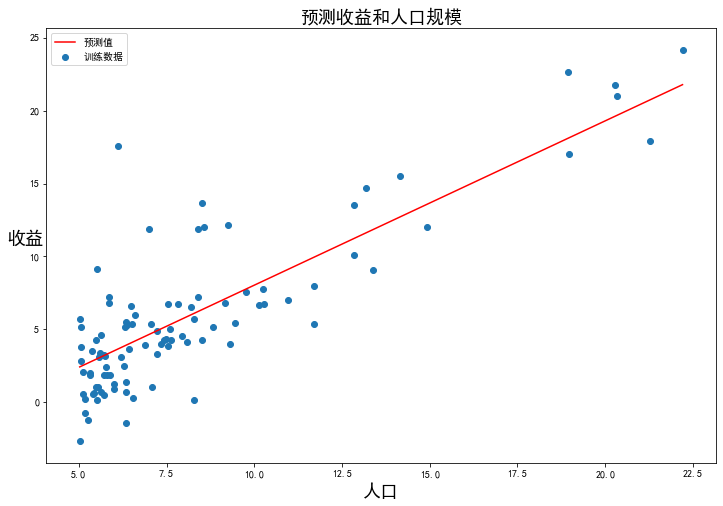

In [20]:
x = np.linspace(data['人口'].min(), data['人口'].max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

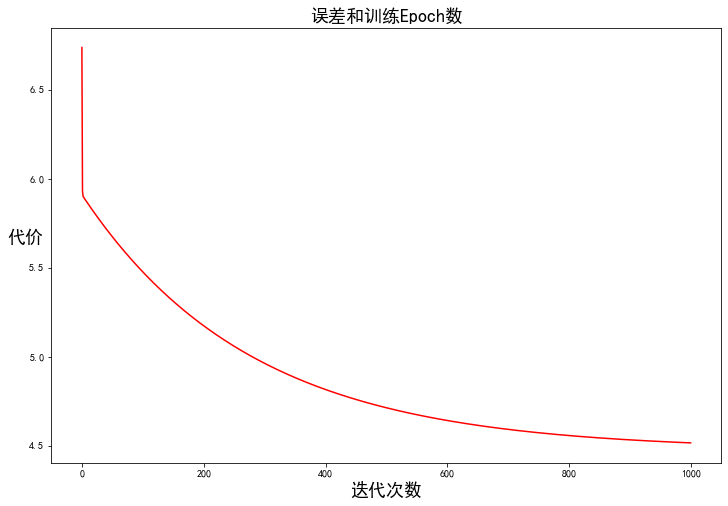

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
ax.set_title('误差和训练Epoch数', fontsize=18)
plt.show()

## 多变量线性回归

练习还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [22]:
path = 'data/regress_data2.csv'
data2 = pd.read_csv(path)
data2.head()

,面积,房间数,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

特征归一化是一种常用的数据预处理技术，用于将不同特征的取值范围缩放到相同的区间内，以便更好地进行数据分析和建模。特征归一化可以提高模型的收敛速度和精度，避免不同特之间的权重差异过大导致的模型偏差。

常用的特征归一化方法包括：

1. 最小-最大归一化（Min-Max Scaling）：将特征缩放到 [0, 1] 区间内，公式如下：

   $$x' = \frac{x - \min(x)}{\max(x) - \min(x)}$$

2. 标准化（Standardization）：将特征缩放到均值为 0，标准差为 1 的正态分布区间内，公式如下：

   $$x' = \frac{x - \mu}{\sigma}$$

其中，$x$ 是原始特征值，$x'$ 是归一化后的特征值，$\min(x)$ 和 $\max(x)$ 分别是特征的最小值和最大值，$\mu$ 和 $\sigma$ 分别是特征的均值和标准差。

需要注意的是，特征归一化应该在练集和测试集上分别进行，以避免信息泄露和模型过合。在进行特征归一化时，应该先对训练集进行归一化，然后使用相同的归一化参数对测试集进行归一化。

In [23]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,面积,房间数,价格
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [24]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
w2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = batch_gradientDescent(X2, y2, w2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

我们也可以快速查看这一个的训练进程。

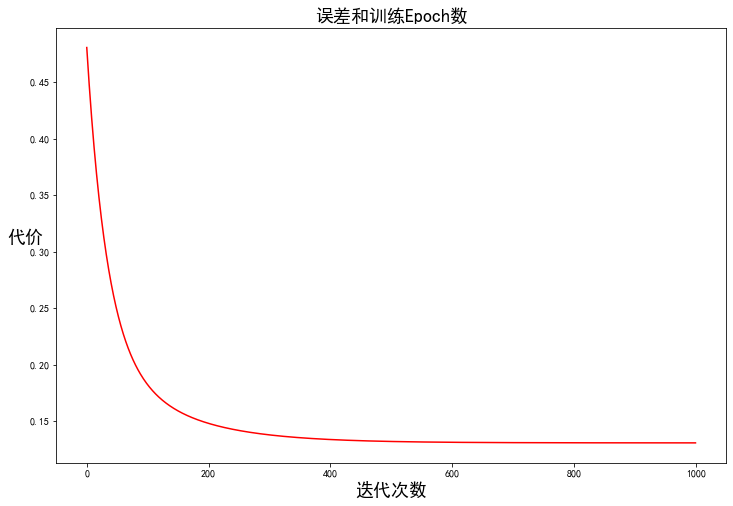

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
ax.set_title('误差和训练Epoch数', fontsize=18)
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

scikit-learn model的预测表现

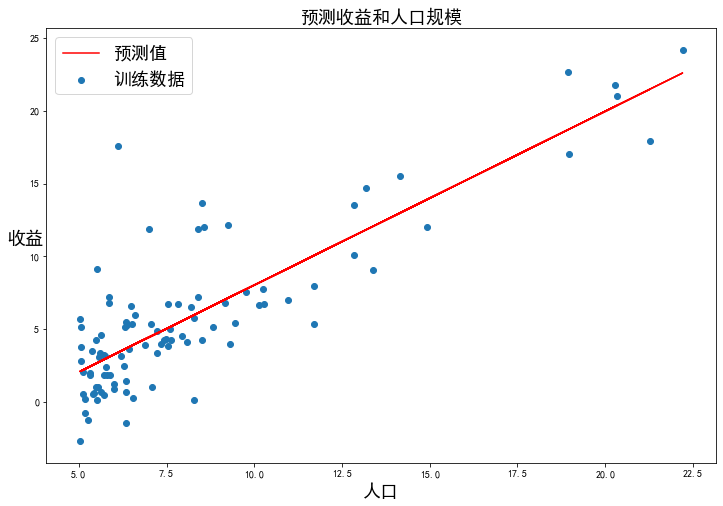

In [27]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## $L_2$正则化
$J (  { w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } w_ { j } ^ { 2 }$，此时称作`Ridge Regression`：

In [28]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X, y)

Ridge()

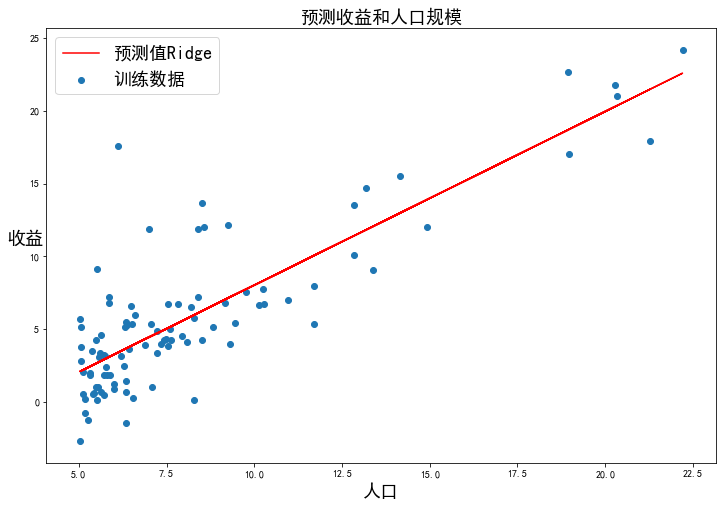

In [29]:
x2 = np.array(X[:, 1].A1)
f2 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x2, f2, 'r', label='预测值Ridge')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## $L_1$正则化：
$J (  {w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } | w _ { j } |$，此时称作`Lasso Regression` 

In [30]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X, y)

Lasso()

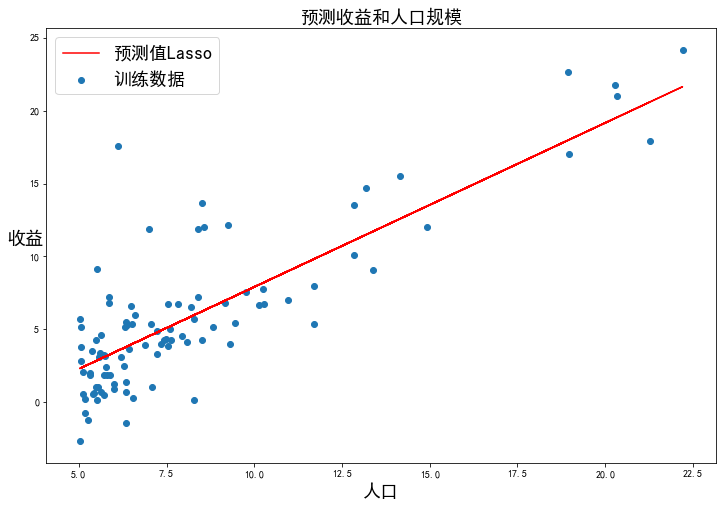

In [31]:
x3= np.array(X[:, 1].A1)
f3 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x3, f3, 'r', label='预测值Lasso')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## 调参

In [32]:
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

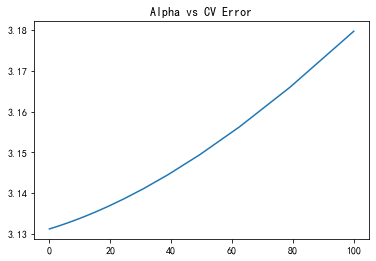

In [33]:
import matplotlib.pyplot as plt
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");
plt.show()

## 最小二乘法(LSM)：

最小二乘法的需要求解最优参数$w^{*}$：

已知：目标函数

$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {h}\left( {x^{(i)}} \right)-{y^{(i)}} \right)}^{2}}}$

其中：${h}\left( x \right)={w^{T}}X={w_{0}}{x_{0}}+{w_{1}}{x_{1}}+{w_{2}}{x_{2}}+...+{w_{n}}{x_{n}}$

将向量表达形式转为矩阵表达形式，则有$J(w )=\frac{1}{2}{{\left( Xw -y\right)}^{2}}$ ，其中$X$为$m$行$n+1$列的矩阵（$m$为样本个数，$n$为特征个数），$w$为$n+1$行1列的矩阵(包含了$w_0$)，$y$为$m$行1列的矩阵，则可以求得最优参数$w^{*} ={{\left( {X^{T}}X \right)}^{-1}}{X^{T}}y$ 

梯度下降与最小二乘法的比较：

梯度下降：需要选择学习率$\alpha$，需要多次迭代，当特征数量$n$大时也能较好适用，适用于各种类型的模型	

最小二乘法：不需要选择学习率$\alpha$，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量$n$较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n^3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [34]:
def LSM(X, y):
    w = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return w

In [35]:
final_w2=LSM(X, y)#感觉和批量梯度下降的theta的值有点差距
final_w2

matrix([[-3.89578088],
        [ 1.19303364]])

In [36]:
#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

## 参考
[1] Andrew Ng. Machine Learning[EB/OL]. StanfordUniversity,2014.https://www.coursera.org/course/ml

[2] 李航. 统计学习方法[M]. 北京: 清华大学出版社,2019.


$$X^TX = \begin{bmatrix}x_{11} & x_{12} & \cdots & x_{1n} \\x_{21} & x_{22} & \cdots & x_{2n} \\\vdots & \vdots & \ddots & \vdots \\x_{n1} & x_{n2} & \cdots & x_{nn}\end{bmatrix} \begin{bmatrix}x_{11} & x_{21} & \cdots & x_{n1} \\x_{12} & x_{22} & \cdots x_{n2} \\\vdots & \vdots & \ddots & \vdots \\x_{1n} & x_{2n} & \cdots & x_{nn}\end{bmatrix}$$





In [ ]:
$$= \begin{bmatrix}\sum_{i=1}^n x_{i1}^2 & \sum_{i=1}^n_{i1}x_{i2} & \cdots & \sum_{i=1}^n x_{i1}x_{in} \\\sum_{i=1}^n x_{i2}x_{i1} & \sum_{i=1}^n x_{i2}^2 & \cdots \sum_{i=1}^n x_{i2}x_{in} \\\vdots & \ots & \ddots & \vdots \\\sumi=1}^n x_{in}x_{i1} & \sum_{i=1}^n x_{in}x_{i2} & \cdots & \sum_{i=1}^n x_{in}^2\end{bmatrix}